## Analysis on serial killers, data scraped from [wikipedia](https://en.wikipedia.org/wiki/List_of_serial_killers_by_number_of_victims)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from bs4 import BeautifulSoup
import requests
%matplotlib inline

#Styling
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 13


In [2]:
# # get the response in the form of html
# wikiurl = "https://en.wikipedia.org/wiki/List_of_serial_killers_by_number_of_victims"
# table_class = "wikitable sortable jquery-tablesorter"
# response = requests.get(wikiurl)
# print(response.status_code)
# # parse data from the html into a beautifulsoup object
# soup = BeautifulSoup(response.text, 'html.parser')
# serial_killer_ranking = soup.find_all('table',{'class':"wikitable"})

# # ------------------------------------------------------------------------------------
# sk_highest = pd.DataFrame(pd.read_html(str(serial_killer_ranking))[0])
# sk_15to30 = pd.DataFrame(pd.read_html(str(serial_killer_ranking))[1])
# sk_5to14 = pd.DataFrame(pd.read_html(str(serial_killer_ranking))[2])
# sk_lt5 = pd.DataFrame(pd.read_html(str(serial_killer_ranking))[3])
# # ------------------------------------------------------------------------------------
# sk_medical = pd.DataFrame(pd.read_html(str(serial_killer_ranking))[4])
# sk_groups_couples = pd.DataFrame(pd.read_html(str(serial_killer_ranking))[5])
# sk_disputed = pd.DataFrame(pd.read_html(str(serial_killer_ranking))[6])

# # concatenae main_df
# dataframes = [sk_highest, sk_15to30, sk_5to14, sk_lt5]
# sks = pd.concat(dataframes) 

# # Concatenation validation
# assert sum(x.shape[0] for x in dataframes) == sks.shape[0]

In [3]:
# Using downloaded data
sks = pd.read_csv('serial_killings.csv')

Dropping unncecessary columms and renaming

In [4]:
sks.drop('Notes', axis=1, inplace=True)
sks.columns = ['Name', 'Country', 'Years_active', 'Proven_victims', 'Possible_victims']
sks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              348 non-null    object
 1   Country           348 non-null    object
 2   Years_active      348 non-null    object
 3   Proven_victims    348 non-null    object
 4   Possible_victims  348 non-null    object
dtypes: object(5)
memory usage: 13.7+ KB


We need to change the datatype of necessary columns

In [5]:
sks.Proven_victims.replace({'13[150]': '13'}, inplace=True)
sks.Proven_victims = sks.Proven_victims.astype(int)

## Proven serial killings over years

In [6]:
''' Now we need to convert the Years_active column, I would just extract first year into Year_start'''
# First find all rows which contain some alphabet, and . and whitespace and then replace them with empty string
display(sks.loc[sks.Years_active.str.contains(r'([::alpha::\.\s])')])
sks.Years_active.replace(r'[a-zA-Z\.\s]+', '', regex=True, inplace=True)

# only select the first year, kind of as a starting year
sks['Year_start'] = sks.Years_active.str.extract(r'^(\d{4})')

print("Added a new column Year_start:-")
sks.head()

/var/folders/vf/3kvlfy4x5ls1s64fxvnlksgm0000gn/T/ipykernel_4769/8696211.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  display(sks.loc[sks.Years_active.str.contains(r'([::alpha::\.\s])')])


,Name,Country,Years_active,Proven_victims,Possible_victims
22,Hadj Mohammed Mesfewi,Morocco,1906 and earlier,36,36+
85,Juana Barraza,Mexico,late 1990s–2006,16,49
157,Enriqueta Martí,Spain,c.1900–1912,12,12+
207,Ali Kaya,Turkey,1997–present,10,10
298,Ernesto Picchioni,Italy,1949 and earlier,4,16
302,Robert Hicks Murray,United Kingdom,1912 and earlier,4,11+
304,Angus Sinclair,United Kingdom,"1961, 1967–1982",4,10
323,Sidney Cooke,United Kingdom,c. 1960–1989,3,20


Added a new column Year_start:-


,Name,Country,Years_active,Proven_victims,Possible_victims,Year_start
0,Luis Garavito,Colombia Ecuador[3] Venezuela[3],1992–1999[3],193,193–300+,1992
1,Pedro López,Colombia Peru Ecuador,1969–1980,110,300+,1969
2,Javed Iqbal,Pakistan,1998–1999,100,100,1998
3,Mikhail Popkov,Russia,1992–2010,78,83+,1992
4,Daniel Camargo Barbosa,Colombia Ecuador Brazil (alleged)[13],1974–1986,72,180[13],1974


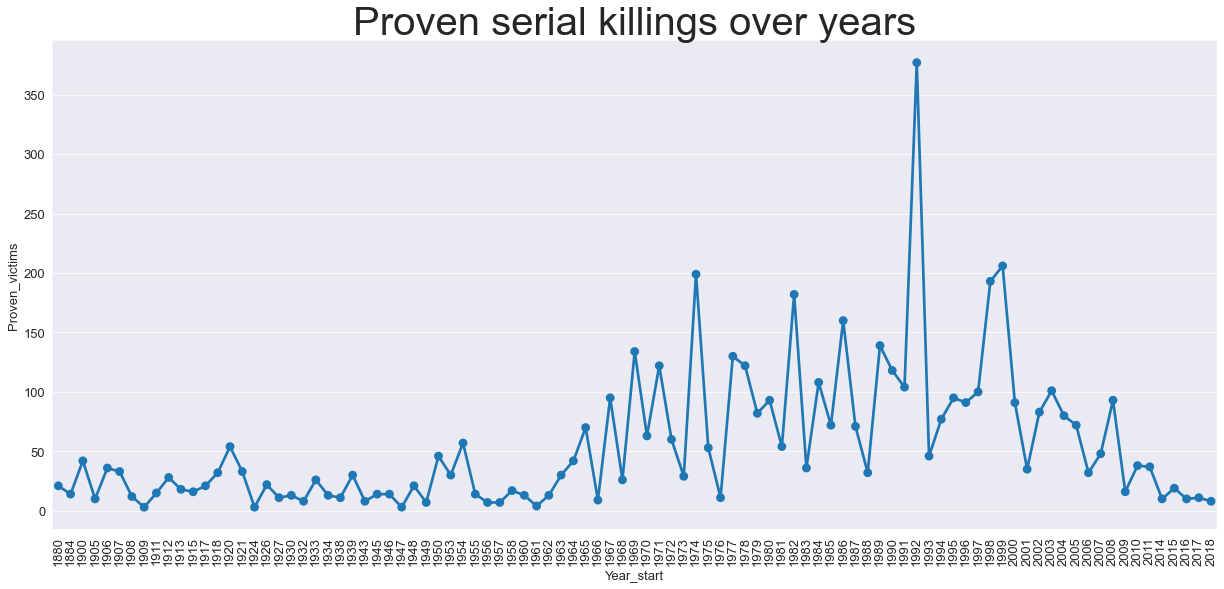

In [7]:
plt.figure(figsize=(17,8))
yearly_sk = sks.groupby('Year_start')[['Proven_victims']].sum()['Proven_victims'] #Pandas series

plt.title('Proven serial killings over years', fontsize=40)
plt.xticks(rotation=90)
plt.tight_layout()
# colors = sns.color_palette('Greens', len(yearly_sk))
# rank = yearly_sk.argsort().argsort()
# sns.barplot(y=yearly_sk, x=yearly_sk.index, palette=np.array(colors)[rank]);
sns.pointplot(y=yearly_sk, x=yearly_sk.index);

## Proven serial killings by country

In [8]:
# Delting everything after that character
print(sks.Country.unique())
sks.Country.replace(r'(\xa0.).*', r'', regex=True, inplace=True)

sks.Country.unique()

['Colombia\xa0Ecuador[3]\xa0Venezuela[3]' 'Colombia\xa0Peru\xa0Ecuador'
 'Pakistan' 'Russia' 'Colombia\xa0Ecuador\xa0Brazil (alleged)[13]'
 'Brazil' 'India' 'China' 'United States' 'Belgian Congo\xa0Tanganyika'
 'Soviet Union' 'Soviet Union\xa0Ukraine' 'Iran' 'Indonesia'
 'South Africa' 'Morocco'
 'Kingdom of Romania Yugoslavia\xa0Hungary (alleged)' 'Mexico'
 'Ottoman Empire Iraq Iran' 'Egypt' 'Germany' 'Colombia' 'Zambia'
 'Swaziland' 'Greece' 'United Kingdom' 'Austria-Hungary'
 'France\xa0Germany (suspected)\xa0Switzerland (suspected)' 'Ecuador'
 'United States\xa0Canada' 'Soviet Union\xa0Russia\xa0Tajikistan'
 'Romania' 'South Korea' 'Costa Rica' 'Soviet Union\xa0Russia' 'Latvia'
 'Turkey' 'France' 'Sri Lanka' 'Peru' 'Ukraine' 'Italy'
 'France\xa0Belgium' 'Spain' 'United States\xa0Mexico' 'Argentina'
 'Poland' 'Chile' 'West Germany' 'Tunisia' 'Venezuela'
 'Thailand Nepal\xa0India\xa0Malaysia' 'Yemen' 'Japan'
 'Austria\xa0United States\xa0Czechoslovakia' 'Belgium' 'Canada'
 'Banglade

array(['Colombia', 'Pakistan', 'Russia', 'Brazil', 'India', 'China',
       'United States', 'Belgian Congo', 'Soviet Union', 'Iran',
       'Indonesia', 'South Africa', 'Morocco',
       'Kingdom of Romania Yugoslavia', 'Mexico',
       'Ottoman Empire Iraq Iran', 'Egypt', 'Germany', 'Zambia',
       'Swaziland', 'Greece', 'United Kingdom', 'Austria-Hungary',
       'France', 'Ecuador', 'Romania', 'South Korea', 'Costa Rica',
       'Latvia', 'Turkey', 'Sri Lanka', 'Peru', 'Ukraine', 'Italy',
       'Spain', 'Argentina', 'Poland', 'Chile', 'West Germany', 'Tunisia',
       'Venezuela', 'Thailand Nepal', 'Yemen', 'Japan', 'Austria',
       'Belgium', 'Canada', 'Bangladesh', 'Australia', 'Kenya',
       'German Empire', 'Denmark', 'Republic of China', 'Cyprus',
       'East Germany', 'Belarus', 'United States Portuguese Angola',
       'Switzerland', 'Czechoslovakia', 'Netherlands', 'Singapore',
       'Belize', 'Allied-occupied Germany'], dtype=object)

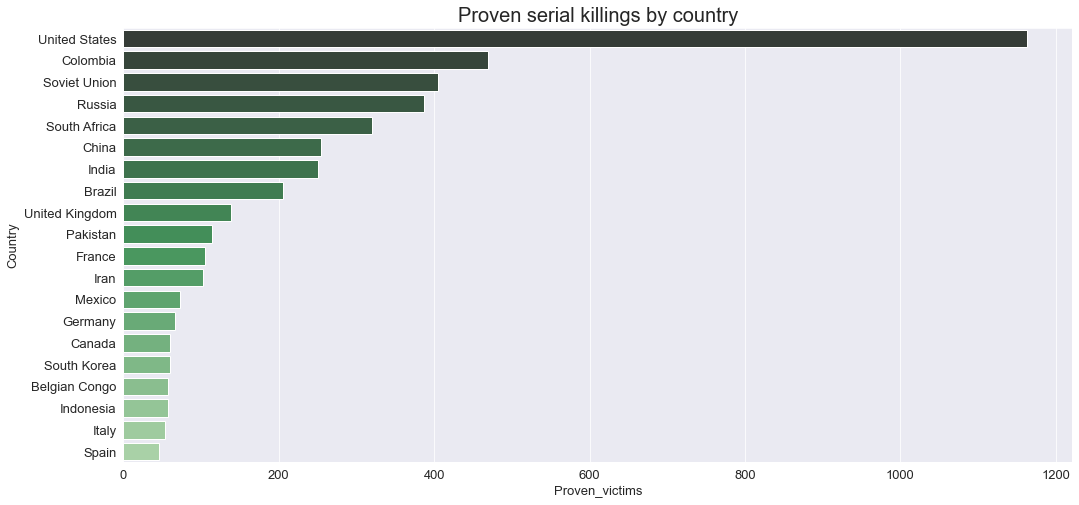

In [9]:
plt.figure(figsize=(17,8))
country_sk = sks.groupby('Country')[['Proven_victims']].sum()['Proven_victims'] #Pandas series
top_countries = country_sk.sort_values(ascending = False).head(20) #Sorted series

num_colors = len(top_countries)
colors = sns.color_palette('Greens_d', len(top_countries))
rank = top_countries.argsort().argsort()
plt.title('Proven serial killings by country', fontsize=20)
sns.barplot(x=top_countries, y=top_countries.index, palette=np.array(colors)[rank]);

In [10]:
sks.head()

,Name,Country,Years_active,Proven_victims,Possible_victims,Year_start
0,Luis Garavito,Colombia,1992–1999[3],193,193–300+,1992
1,Pedro López,Colombia,1969–1980,110,300+,1969
2,Javed Iqbal,Pakistan,1998–1999,100,100,1998
3,Mikhail Popkov,Russia,1992–2010,78,83+,1992
4,Daniel Camargo Barbosa,Colombia,1974–1986,72,180[13],1974
